<h1>Rainfall Prediction using Machine Learning – Python</h1>
<h4> By Dr.Suhas Rokde, Data Scientist</h4><hr>
Rainfall prediction is a common application of machine learning, and linear regression is a simple and effective technique that can be used for this purpose. In this task, the goal is to predict the amount of rainfall based on historical data.

Linear regression is a supervised learning algorithm that is used to model the relationship between a dependent variable and one or more independent variables. In this case, the dependent variable is the amount of rainfall, and the independent variables are the features that are used to predict it, such as temperature, humidity, wind speed, etc.

The first step is to collect the historical data, which includes the amount of rainfall and the corresponding values of the independent variables. Once the data has been collected, it needs to be cleaned and preprocessed to remove any outliers or missing values.

Next, the data is split into two sets: the training set and the testing set. The training set is used to train the model, while the testing set is used to evaluate its performance.

In [1]:
# importing libraries
import pandas as pd
import numpy as np

# read the data in a pandas dataframe
data = pd.read_csv("/kaggle/input/austin-weather/austin_weather.csv")

data.head()

,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [2]:
data.shape

(1319, 21)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        1319 non-null   object
 1   TempHighF                   1319 non-null   int64 
 2   TempAvgF                    1319 non-null   int64 
 3   TempLowF                    1319 non-null   int64 
 4   DewPointHighF               1319 non-null   object
 5   DewPointAvgF                1319 non-null   object
 6   DewPointLowF                1319 non-null   object
 7   HumidityHighPercent         1319 non-null   object
 8   HumidityAvgPercent          1319 non-null   object
 9   HumidityLowPercent          1319 non-null   object
 10  SeaLevelPressureHighInches  1319 non-null   object
 11  SeaLevelPressureAvgInches   1319 non-null   object
 12  SeaLevelPressureLowInches   1319 non-null   object
 13  VisibilityHighMiles         1319 non-null   obje

In [4]:
data.describe()

,TempHighF,TempAvgF,TempLowF
count,1319.000000,1319.000000,1319.000000
mean,80.862775,70.642911,59.902957
std,14.766523,14.045904,14.190648
min,32.000000,29.000000,19.000000
25%,72.000000,62.000000,49.000000
50%,83.000000,73.000000,63.000000
75%,92.000000,83.000000,73.000000
max,107.000000,93.000000,81.000000


In [5]:
# drop or delete the unnecessary columns in the data.
data = data.drop(['Events', 'Date', 'SeaLevelPressureHighInches',
				'SeaLevelPressureLowInches'], axis=1)

# some values have 'T' which denotes trace rainfall
# we need to replace all occurrences of T with 0
# so that we can use the data in our model
data = data.replace('T', 0.0)

# the data also contains '-' which indicates no
# or NIL. This means that data is not available
# we need to replace these values as well.
data = data.replace('-', 0.0)

# save the data in a csv file
data.to_csv('austin_final.csv')


In [6]:
data.head()

,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67,49,43,93,75,57,29.68,10,7,2,20,4,31,0.46
1,56,48,39,43,36,28,93,68,43,30.13,10,10,5,16,6,25,0
2,58,45,32,31,27,23,76,52,27,30.49,10,10,10,8,3,12,0
3,61,46,31,36,28,21,89,56,22,30.45,10,10,7,12,4,20,0
4,58,50,41,44,40,36,86,71,56,30.33,10,10,7,10,2,16,0.0


Once the data is cleaned, it can be used as input to our Linear regression model. Linear regression is a linear approach to forming a relationship between a dependent variable and many independent explanatory variables. This is done by plotting a line that fits our scatter plot the best, ie, with the least errors. This gives value predictions, ie, how much,  by substituting the independent values in the line equation. We will use Scikit-learn’s linear regression model to train our dataset. Once the model is trained, we can give our own inputs for the various columns such as temperature, dew point, pressure, etc. to predict the weather based on these attributes. 

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The precipitation in inches for the input is: [[1.33868402]]
the precipitation trend graph: 


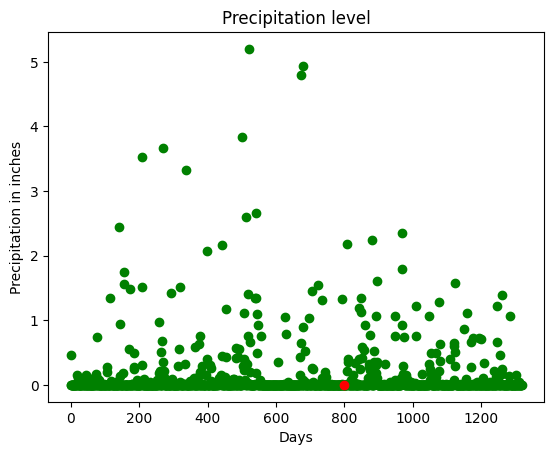

Precipitation vs selected attributes graph: 


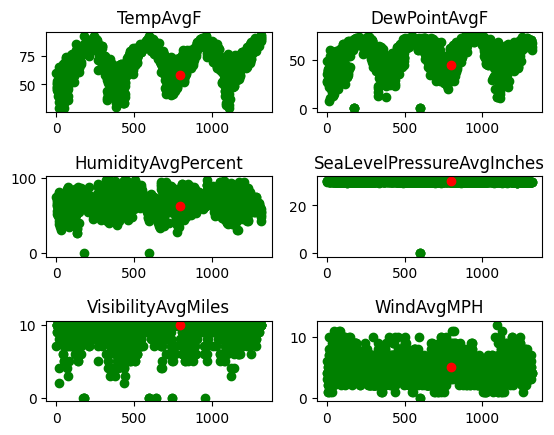

In [7]:
# importing libraries
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# read the cleaned data
data = pd.read_csv("austin_final.csv")

# the features or the 'x' values of the data
# these columns are used to train the model
# the last column, i.e, precipitation column
# will serve as the label
X = data.drop(['PrecipitationSumInches'], axis=1)

# the output or the label.
Y = data['PrecipitationSumInches']
# reshaping it into a 2-D vector
Y = Y.values.reshape(-1, 1)

# consider a random day in the dataset
# we shall plot a graph and observe this
# day
day_index = 798
days = [i for i in range(Y.size)]

# initialize a linear regression classifier
clf = LinearRegression()
# train the classifier with our
# input data.
clf.fit(X, Y)

# give a sample input to test our model
# this is a 2-D vector that contains values
# for each column in the dataset.
inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45],
				[57], [29.68], [10], [7], [2], [0], [20], [4], [31]])
inp = inp.reshape(1, -1)

# print the output.
print('The precipitation in inches for the input is:', clf.predict(inp))

# plot a graph of the precipitation levels
# versus the total number of days.
# one day, which is in red, is
# tracked here. It has a precipitation
# of approx. 2 inches.
print("the precipitation trend graph: ")
plt.scatter(days, Y, color='g')
plt.scatter(days[day_index], Y[day_index], color='r')
plt.title("Precipitation level")
plt.xlabel("Days")
plt.ylabel("Precipitation in inches")


plt.show()
x_vis = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
				'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
				'WindAvgMPH'], axis=1)

# plot a graph with a few features (x values)
# against the precipitation or rainfall to observe
# the trends

print("Precipitation vs selected attributes graph: ")

for i in range(x_vis.columns.size):
	plt.subplot(3, 2, i + 1,)
	plt.scatter(days, x_vis[x_vis.columns.values[i][:100]],
				color='g')

	plt.scatter(days[day_index],
				x_vis[x_vis.columns.values[i]][day_index],
				color='r')

	plt.title(x_vis.columns.values[i])

#Adjust the gap betweeb subblots using subplots_adjust
plt.subplots_adjust(hspace=0.8)   #You can adjust the hspace value as needed

plt.show()


Precipitation vs selected attributes graph: 

 A day (in red) having precipitation of about 2 inches is tracked across multiple parameters (the same day is tracker across multiple features such as temperature, pressure, etc). The x-axis denotes the days and the y-axis denotes the magnitude of the feature such as temperature, pressure, etc. From the graph, it can be observed that rainfall can be expected to be high when the temperature is high and humidity is high.